In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [184]:
df = pd.read_csv("../cleaned/clean_data_india.csv")
df.head()

,restaurant_name,city,locality,cuisines,average_cost_for_two,has_table_booking,has_online_delivery,price_range,aggregate_rating,rating_text,votes
0,Jahanpanah,Agra,Agra Cantt,"North Indian, Mughlai",850,No,No,3,3.9,Good,140
1,Rangrezz Restaurant,Agra,Agra Cantt,"North Indian, Mughlai",700,No,No,2,3.5,Good,71
2,Time2Eat - Mama Chicken,Agra,Agra Cantt,North Indian,500,No,No,2,3.6,Good,94
3,Chokho Jeeman Marwari Jain Bhojanalya,Agra,Civil Lines,Rajasthani,400,No,No,2,4.0,Very Good,87
4,Pinch Of Spice,Agra,Civil Lines,"North Indian, Chinese, Mughlai",1000,No,No,3,4.2,Very Good,177


## Which Indian cities have the highest number of restaurants?

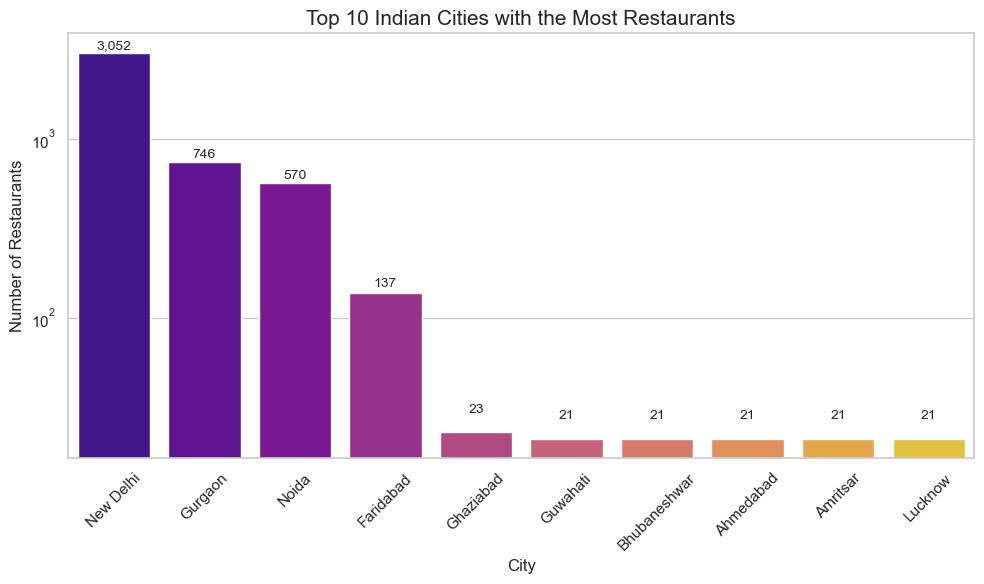

In [72]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

count_city = df["city"].value_counts().sort_values(ascending=False).head(10)

ax = sns.barplot(x=count_city.index, y=count_city.values, hue=count_city.index, palette="plasma")

plt.title("Top 10 Indian Cities with the Most Restaurants", fontsize=15)
plt.ylabel("Number of Restaurants", fontsize=12)
plt.xlabel("City", fontsize=12)
plt.xticks(rotation=45)
plt.yscale("log")
for i, val in enumerate(count_city.values):
    ax.text(i, val+5, f"{val:,}", ha="center", va="bottom", fontsize=10)
plt.tight_layout()
plt.savefig("../visuals/indian_cities_with_most_restaurants.png", dpi=300, bbox_inches="tight")
plt.show()

### Insights
- **New Delhi** clearly dominates with **3052 restaurants**, far ahead of other cities.
- **Gurgoan** and **Noida** follow with **746** and **570** restaurants respectively, showing the NCR region is a major food hub.
- After the top 3, there's a sharp drop in numbers. **Faridabad** has only **137 restaurants**.
- The remaining cities (Ghaziabad, Guwahati, Bhubhaneshwar, Ahmedabad, Amritsar, Luknow) each have only **21-23 restaurants**.

## What are the most popular cuisines in India?

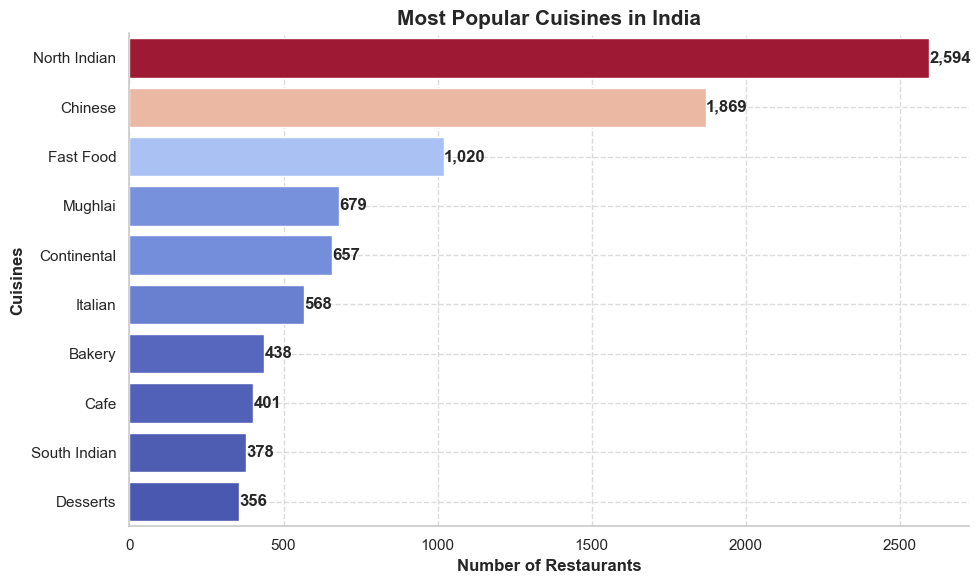

In [182]:
from collections import Counter
all_cuisines = df["cuisines"].str.split(", ").tolist()
flat_cuisines = [cuisines.strip() for sublist in all_cuisines for cuisines in sublist]
cuisines_count = Counter(flat_cuisines)
cuisines_df = pd.DataFrame(cuisines_count.items(), columns=["Cuisines", "Count"])
cuisines_df = cuisines_df.sort_values(by="Count", ascending=False).reset_index(drop=True).head(10)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Count", y="Cuisines", data=cuisines_df, hue="Count", palette="coolwarm", legend=False)
plt.title("Most Popular Cuisines in India", fontsize=15, fontweight="bold")
plt.xlabel("Number of Restaurants", fontsize=12, fontweight="bold")
plt.ylabel("Cuisines", fontsize=12, fontweight="bold")
plt.grid(True, linestyle="--", linewidth=1, alpha=0.7)
sns.despine()
for i, val in enumerate(cuisines_df["Count"].values):
    ax.text(val+1, i, f"{val:,}", ha="left", va="center", fontsize=12, fontweight="bold")
plt.savefig("../visuals/most_popular_cuisines_in_india.png", dpi=300, bbox_inches="tight")
plt.tight_layout()
plt.show()

### Insights
- **North Indian cuisine** stand out as the most dominant preference in India, with **2,594 restaurants**.
- **Chinese cuisine** is the second-most popular, with **1,869 restaurants**.
- **Fast Food** occupies the third position with **1,020 restaurants**.
- **Mughali** and **Continental** cuisines follow next, with **679** and **657**.

## Which type of restaurants are most common in India (e.g. Cafe, Quick, Bites, Casual Dining)?

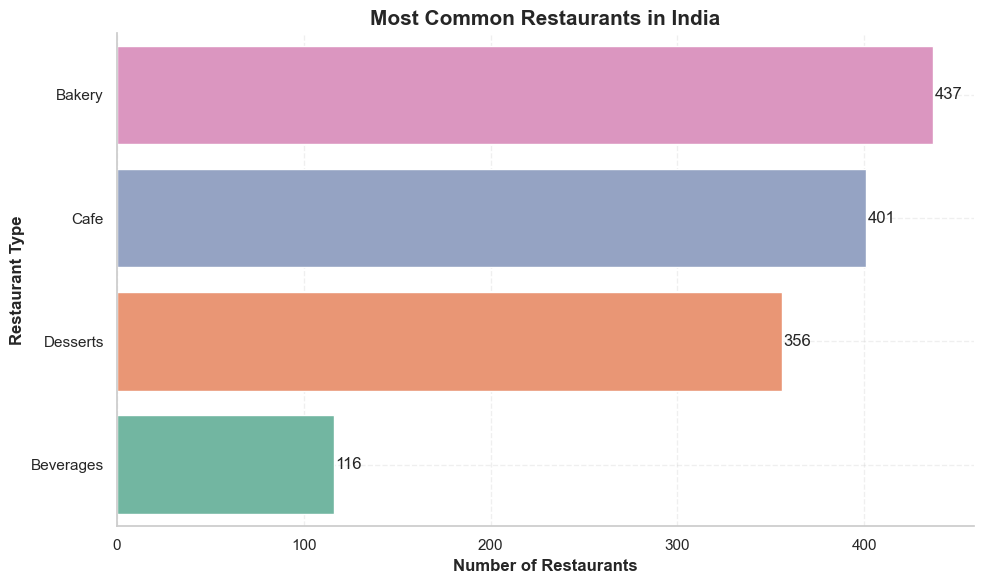

In [221]:
from collections import Counter

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
rest_types =  ["Cafe", "Bakery", "Quick",  "Bites", "Desserts", "Sweet Shop", "Food Court", "Beverages", "Lounge", "Bar"]
type_counter = Counter()

for entry in df["cuisines"].dropna():
    for rest in rest_types:
        if rest.lower() in entry.lower():
            type_counter[rest] += 1

type_df = pd.DataFrame(type_counter.items(), columns=["Restaurant Type", "Count"]).sort_values(by="Count", ascending=False)

ax = sns.barplot(x="Count", y="Restaurant Type", data=type_df, hue="Count", palette="Set2", legend=False)
plt.title("Most Common Restaurants in India", fontsize=15, fontweight="bold")
plt.ylabel("Restaurant Type", fontsize=12, fontweight="bold")
plt.xlabel("Number of Restaurants", fontsize=12, fontweight="bold")
plt.grid(True, linestyle="--", alpha=0.3)
sns.despine()
for i, val in enumerate(type_df["Count"]):
    ax.text(val+1, i, f"{val:,}", va="center")
plt.savefig("../visuals/most_common_restaurants_in_india.png", dpi=300, bbox_inches="tight")
plt.tight_layout()
plt.show()

### Insights
- **Bakery restaurants** are most common in India, with **437 establishments**.
- **Cafes** are the second most prevalent, with **401 restaurants**
- **Desserts** with **356 outlets**, show that Indians have a strong sweet tooth.
- **Beverages only restaurants**, though fewer at **116**.

## What is the distribution of restaurant ratings in India?

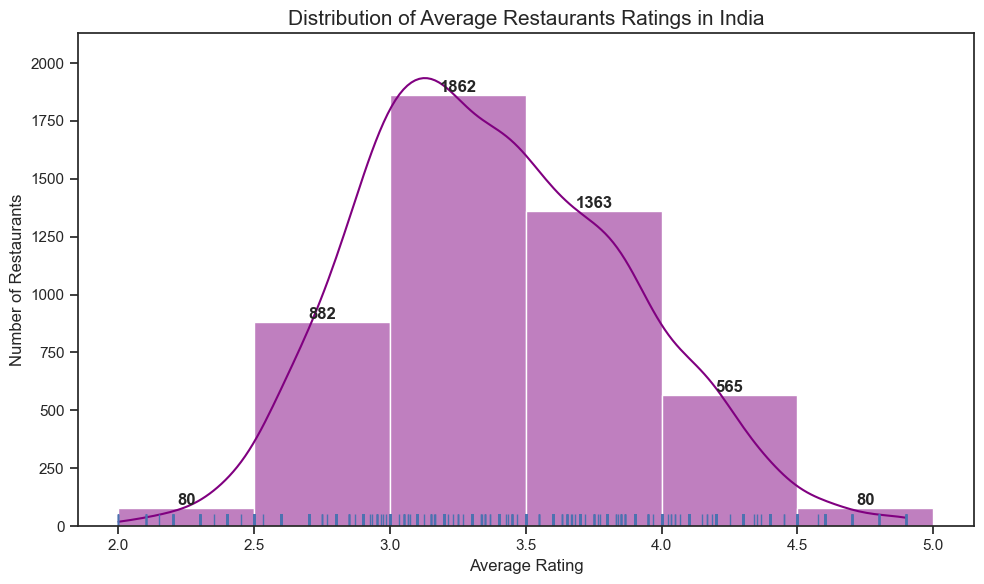

In [136]:

sns.set(style="ticks")
plt.figure(figsize=(10, 6))
avg_rating = df.groupby("restaurant_name")["aggregate_rating"].mean().reset_index()

ax = sns.histplot(avg_rating["aggregate_rating"], bins=[2, 2.5, 3, 3.5, 4, 4.5, 5], kde=True, color = "purple")
sns.rugplot(avg_rating["aggregate_rating"])
plt.title("Distribution of Average Restaurants Ratings in India", fontsize=15)
plt.xlabel("Average Rating", fontsize=12)
plt.ylabel("Number of Restaurants", fontsize=12)
for i in ax.patches:
    height = i.get_height()
    ax.annotate(f"{int(height)}",(i.get_x()+i.get_width()/2, height), ha="center", va="bottom", fontsize=12, weight="bold")
plt.savefig("../visuals/india_ratings_distribution.png", dpi=300, bbox_inches="tight")
plt.tight_layout()
plt.show()


### Insights
- The average restaurants ratings in India are **concentrated between 2.5 and 4.0**, showing a **right-skewed distribution**(positively skewed). This indicates most restaurants fall in the mid-range of customer satisfaction.
- The **peak rating range is 3.0-3.5** with **1862 restaurants**, followed by the **3.5-4.0 range** with **1363 restaurants**. This suggests that most restaurants maintain a good but not excellent-level of service and food quality.
- **Lower rated restaurants (2.0-2.5)** and **highly-rated ones (4.5-5.0)** are relatively rare, each with only **80 restaurants**. This reflects two possible realities:
  - Few restaurants perform extremely poorly or exceptionally well.
  - Most ratings naturally cluster around the average due to customer expectations and leniency bias.
- Rating above 4.0 are fewer in number (**only 645 total in 4.0-5.0 range**), implying that **exceptional service and food are rare and harder to consistently maintain** across the country.

## Which cities have the highest average ratings?

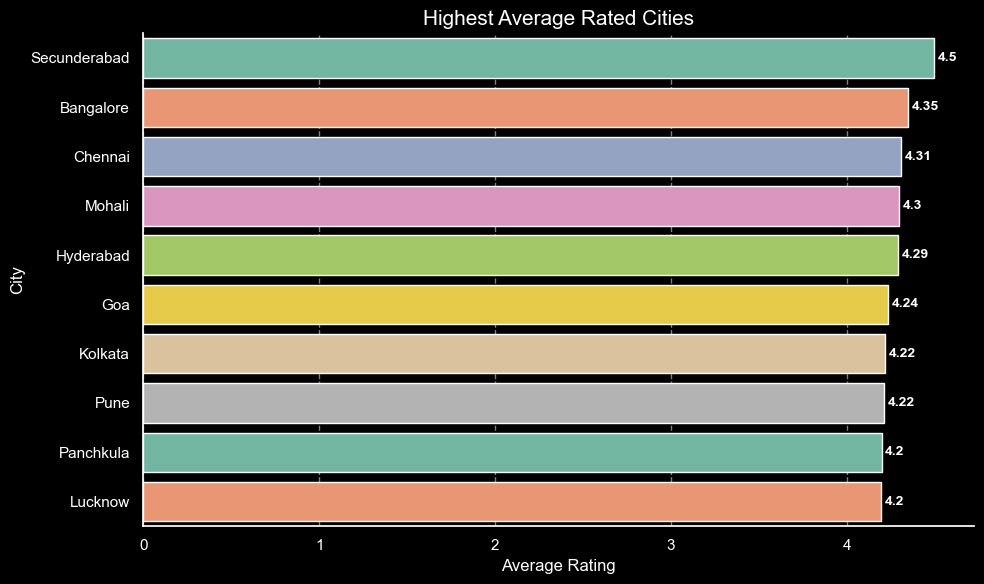

In [68]:
plt.style.use("dark_background")
plt.figure(figsize=(10, 6))

city_count = df.groupby("city")["aggregate_rating"].mean().sort_values(ascending=False).head(10)

ax = sns.barplot(x=city_count.values, y=city_count.index, hue=city_count.index, palette="Set2", legend=False)
plt.title("Highest Average Rated Cities", fontsize=15)
plt.xlabel("Average Rating", fontsize=12)
plt.ylabel("City", fontsize=12)
plt.tight_layout()
sns.despine()
plt.grid(axis="x", linestyle="--", alpha=0.5)
for i, val in enumerate(city_count.values):
    ax.text(val+0.02, i, f"{val:.3}", va="center", fontsize=10, fontweight="bold")
plt.savefig("../visuals/highest_avg_rated_cities", dpi=300, bbox_inches="tight")
plt.show()

### Insights
- **Secunderabad tops the list** with an impressive **average rating of 4.50** possibly due to a smaller number of restaurants but higher service quality.
- **Cities like Bangalore, Chennai and Hyderabad** also feature strongly, reflecting high standards and strong competition in the food industry.
- **Cities like Mohali, Panchkula and Lucknow** also make it to the top 10,showing that **quality dining is expanding beyond Tier 1 cities**.
- **Goa**, a popular tourist destination, has a high rating of **4.24**, likely due to hospitality-driven food businesses.

## Is there any relationships between rating and cost for two in India?

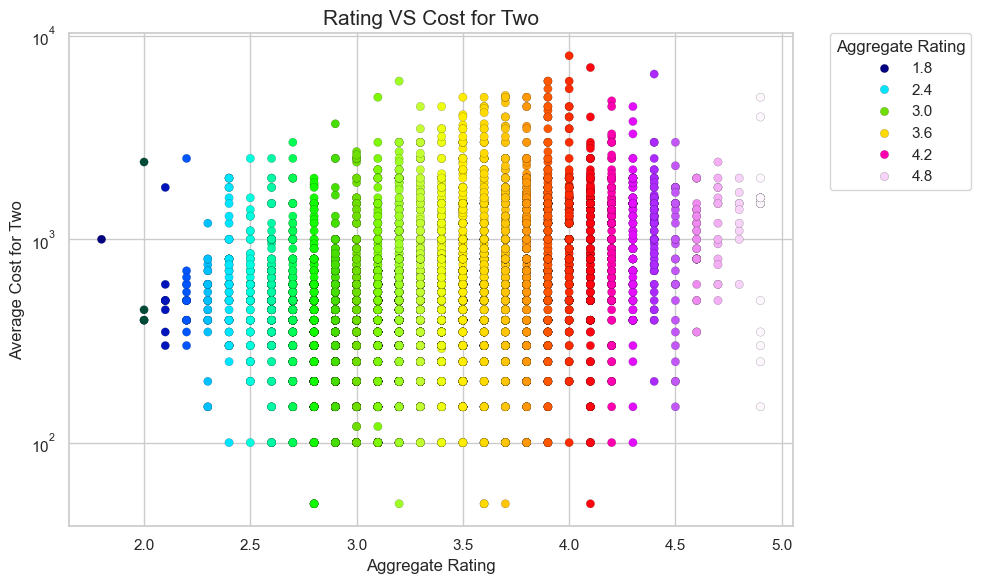

In [249]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.scatterplot(x="aggregate_rating", y="average_cost_for_two", data=df, hue="aggregate_rating", sizes=(60, 10), palette="gist_ncar", 
               edgecolor="black", linewidth=0.1)
plt.title("Rating VS Cost for Two", fontsize=15)
plt.xlabel("Aggregate Rating", fontsize=12)
plt.ylabel("Average Cost for Two", fontsize=12)
plt.yscale("log")
plt.legend(title="Aggregate Rating", bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.)
plt.tight_layout()
plt.savefig("../visuals/rating_vs_cost.png", dpi=300, bbox_inches="tight")
plt.show()

### Insights
- There is **no clear relationship** between rating and cost.
- High-rated restaurants are found in **both low and high cost** ranges.
- Most restaurants with rating between **3.5 to 4.5** have cost around **Rs.300 to Rs.800**.

Conclusion: Rating is **not only dependent on price**. Affordable restaurants can also get high ratings if they provide good food and service.

## How many restaurants offer online delivery in Indian cities?

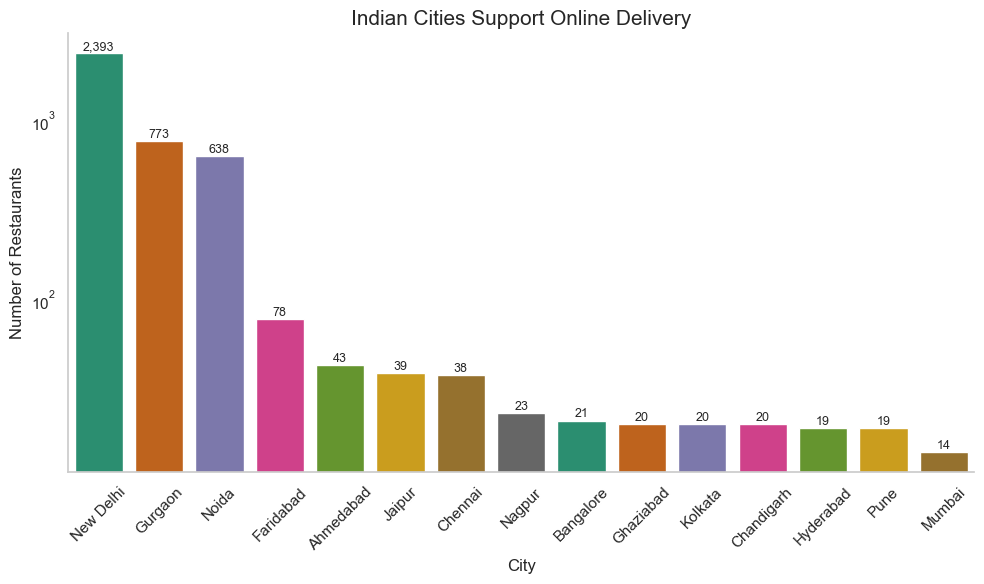

In [196]:
online_delivery = df[df["has_online_delivery"] == "Yes"]
delivery_count = online_delivery.groupby("city")["restaurant_name"].count().sort_values(ascending=False).head(15)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=delivery_count.index, y=delivery_count.values, hue=delivery_count.index, legend=False, palette="Dark2")
plt.title("Indian Cities Support Online Delivery", fontsize=15)
plt.ylabel("Number of Restaurants")
plt.xlabel("City")
ax.grid(False)
sns.despine()
plt.yscale("log")
plt.xticks(rotation=45)
plt.tight_layout()
for i, val in enumerate(delivery_count.values):
   ax.text(i, val+0.02, f"{val:,}", ha="center", va="bottom", fontsize=9) 
plt.savefig("../visuals/indian_cities_support_online_delivery", dpi=300, bbox_inches="tight")
plt.show()

### Insights
- **New Delhi** leads with a significant margin, hosting **2,393 restaurants** that support online delivery-over **3x more** than the next city.
- **Gurgoan** (773) and **Noida** (638) follow, highlighting the **NCR region** as a dominant hub for food delivery services in India.
- Cities like **Faridabad (78)** and **Ahmedabad (43)** contribute moderately, but there's a steep drop after the top 3 cities.
- Surprisingly, major metros like **Mumbai (14)**, **Pune (19)** and **Hyderabad (19)** have a **much smaller footprint**, with online delivery platforms during data coollection.

## Which cuisines are most highly rated in India ?

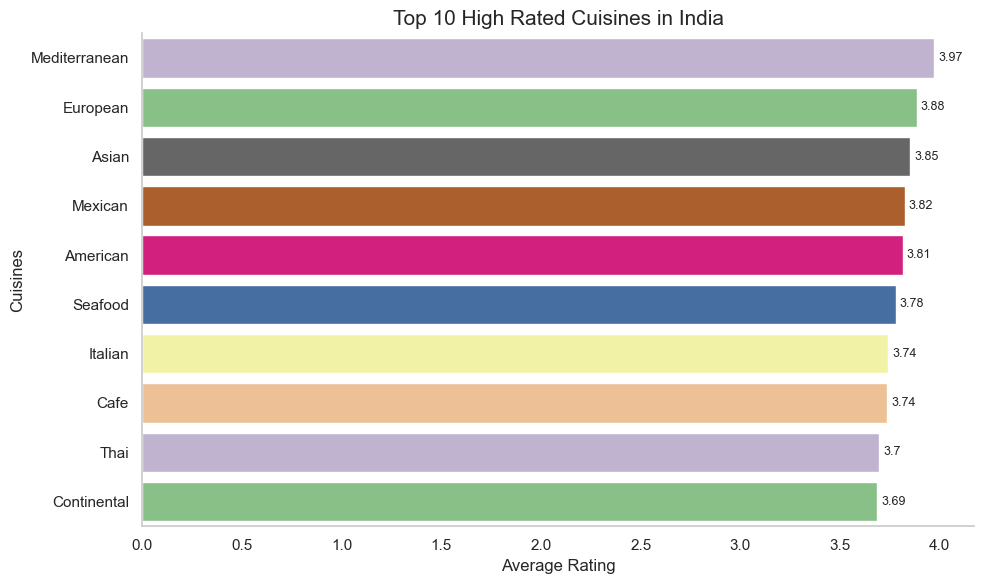

In [152]:
df["cuisines"] = df["cuisines"].astype(str).str.split(", ")
df = df.explode("cuisines")
cuisine_rating = df.groupby("cuisines")["aggregate_rating"].mean()
cuisine_counts = df["cuisines"].value_counts()
popular_cuisines = cuisine_counts[cuisine_counts > 20].index
cuisine_rating = cuisine_rating.loc[popular_cuisines]

top_cuisines = cuisine_rating.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_cuisines.values, y=top_cuisines.index, hue=top_cuisines.values, palette="Accent", legend=False)
plt.title("Top 10 High Rated Cuisines in India", fontsize=15)
plt.xlabel("Average Rating", fontsize=12)
plt.ylabel("Cuisines", fontsize=12)
ax.grid(False)
sns.despine()
for i, val in enumerate(top_cuisines.values):
    ax.text(val+0.02, i, f"{val:.3}", ha="left", va="center", fontsize=9)
plt.tight_layout()
plt.savefig("../visuals/top10_high_rated_cuisines_in_india.png", dpi=300, bbox_inches="tight")
plt.show()

### Insights
- **Mediterranean cuisine** leads the rankings with an impressive **average rating of 3.97**, reflecting growing appreciation for healthier and globally inspired food options.
- **European (3.88)** and **Asian (3.85)** cuisines closely follow, highlighting Indian dinners.
- **Mexican (3.82)** and **American (3.81)** cuisines are also amon the top favourites, indicating the strong demand for bold and fast food inspired meals.
- **Seafood cuisine (3.78)** holds its place in top tier.
- **Italian (3.74)** and **Cafe-style food (3.74)** maintain similar popularity.
- **Thai (3.70)** and **Continental (3.69)** cuisines round off the top 10 with good ratings.

## Summary of Insights

This deep dive into India-specific restaurant data provides a holistic view of customer preferences, restaurant types, city-wise trends, and cuisine popularity. The analysis answers 8 key business questions, revealing the following insights:

1. **New Delhi, Gurgaon, and Bengaluru** top the list for the **highest number of restaurants**, reinforcing their status as major food and tech hubs.
2. **North Indian, Chinese, and Fast Food** emerge as the **most popular cuisines**, showing a strong local and affordable preference among Indian consumers.
3. **Casual Dining, Quick Bites, and Cafes** are the **most common restaurant types**, highlighting India’s fast-paced lifestyle and preference for convenient dining.
4. Most restaurants fall within the **3.0 to 4.0 rating range**, with relatively few earning extreme low or high ratings, indicating balanced customer satisfaction.
5. Cities like **Bhubaneswar, Surat, and Chandigarh** report **higher average ratings**, suggesting strong customer satisfaction in smaller, well-managed food markets.
6. There is **no strong linear correlation between average rating and cost for two**, implying that customers rate more on food quality, service, or ambiance than price.
7. Online food delivery is heavily concentrated in **New Delhi (2,393+ restaurants)**, followed by **Gurgaon and Noida**, signaling that the **NCR region is the most digitally integrated** food market in India.
8. **Mediterranean, European, and Asian cuisines** are the **most highly rated**, showing increasing appreciation for global flavors and fusion experiences.
